In [1]:
import numpy as np
from random import random       
import matplotlib.pyplot as plt
from li_rn_network import li_rnn_networks, task_3back

In [2]:
#パラメータの定義　difine parameter
high_value = 1.0 #カテゴリーが提示された場合の画像提示時とインターバル時の出力
low_value = 0.0 #カテゴリーが提示されていない場合の出力
category_num = 2 #カテゴリー数
steps_num = 3 #チャンク数

In [3]:
#入力用データと教師用データを作成（３バック問題）　generate input and target data(3back task)
input_data, target_data =task_3back(high_value, low_value, category_num)

In [4]:
input_data

array([[[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [1., 0.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]]])

In [5]:
target_data

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [6]:
#ネットワークモデルの定義　difine network model
I = category_num # 入力層のニューロン数　number of input layer's neuron
H = 100 #リカレント結合をもつ中間層のニューロン数 number of hidden layer's neuron(reccurent)
O = category_num #出力層のニューロン数

Wih_size = 4 #入力層から中間層への結合の初期値の値　initial size of bond strength I to H
Whh_size = 2 #層内結合の結合の初期値の値　initial size of bond strength H to H
Who_size = 3 #中間層から出力層への結合の初期値の値　initial size of bond strength I to H

lr = 0.01 #学習率　learning rate
optimizer_model = 0 #オプティマイザーの選択　chose optimizer_model

In [7]:
#ニューロンの生理学的パラメータの定義
Tau_H = 100 #ニューロンの時定数(10～200)
Tau_O = 70 #ニューロンの時定数(10～100)
dt = 0.01 #オイラー法の最小時間(0.1～0.005)
step_length = 100 #同じ入力が続く時間ms time length of one step
size_nois = 1

In [8]:
lr

0.01

In [9]:
#ネットワークモデルの生成
li_rnn = li_rnn_networks(I,H,O,Wih_size,Whh_size,Who_size,steps_num)
#学習に関するパラメータの設定　set parameter of leaning
li_rnn.setlr(lr,optimizer_model)

In [10]:
epoch = 10000 #学習回数の定義　difine leaning epoch
#学習の実行 taraning
loss_memo = li_rnn.traning(input_data,target_data,epoch)#出力は誤差のリスト output is list of loss

loss: 0.03430637575942965 epoch: 5500
_________
out1: [[2.99098519e-02 7.06085544e-01 5.08444724e-02 7.90448890e-01
  6.02435072e-01 1.62410711e-01 1.94226813e-04 8.60170995e-01
  3.96520735e-04 5.69124297e-01 3.73052515e-02 4.94344074e-01
  6.44903680e-01 8.89385217e-01 2.18343657e-01 2.29078011e-02
  4.80614709e-02 6.15404400e-04 8.76092985e-02 8.79960919e-01
  2.21632942e-03 9.48801384e-02 2.86648579e-01 1.49236084e-01
  1.92095383e-01 9.36266207e-01 2.23003892e-02 8.15163125e-01
  1.44212466e-02 5.58539413e-02 6.06673902e-02 2.47979412e-01
  9.86100905e-01 2.81734427e-01 7.17393648e-04 5.58014499e-01
  4.66432892e-01 8.72820830e-02 9.90373364e-01 9.80623650e-01
  1.69707368e-01 6.58190150e-01 7.73346027e-02 9.98520263e-01
  9.95487899e-01 1.64585393e-02 1.75799585e-01 1.85977053e-01
  1.94144752e-01 5.54688482e-02 1.09692359e-01 1.76436477e-01
  9.33586072e-01 9.98745086e-01 9.23906538e-01 7.80025962e-01
  8.81821488e-01 6.24670082e-02 1.67173338e-02 3.37922089e-01
  8.32780845e-02

loss: 0.09272536318596299 epoch: 8000
_________
out1: [[1.38411813e-01 2.27988011e-05 2.10518355e-02 9.60549249e-01
  3.10915578e-01 8.36581323e-01 1.20520004e-02 3.09358304e-01
  1.29471158e-01 6.80284285e-03 3.62073042e-01 1.89605100e-02
  6.98181044e-01 8.64247789e-01 8.10909728e-02 5.20145431e-04
  1.57782886e-01 1.18773995e-01 1.85304661e-01 9.71695065e-01
  1.40176475e-03 6.91209885e-03 1.96480045e-03 9.80212551e-01
  8.13513241e-01 8.95010944e-01 6.24593862e-01 9.50022614e-01
  3.32813522e-02 2.44964259e-01 2.26569173e-01 9.36142625e-02
  9.97399712e-01 4.90740092e-01 9.39144776e-04 8.70547074e-01
  4.78671875e-02 1.04615514e-02 9.62764999e-01 9.99879572e-01
  5.41916241e-02 1.14879481e-01 9.34406574e-03 9.88460814e-01
  9.63502435e-01 5.94229748e-01 8.38132003e-01 9.92227423e-01
  8.09529611e-01 1.34144911e-02 8.33843883e-01 2.18261815e-01
  1.73295861e-03 9.99967699e-01 9.71277251e-01 3.65845333e-02
  1.98354682e-02 1.40281880e-02 9.82000612e-03 9.17155006e-01
  3.28096667e-02

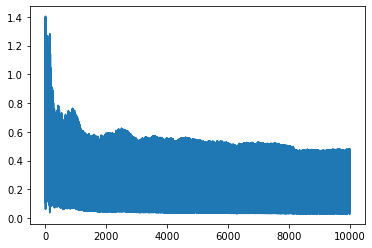

In [11]:
#学種回数ごとの誤差の出力　visualize loss on taraning epochs
plt.plot(loss_memo)

In [12]:
ix = input_data[2]
li_rnn.def_parameter(Tau_H, Tau_O, dt, size_nois, step_length)
memo_out1, memo_out2 = li_rnn.li_forward(ix, target_data[1])

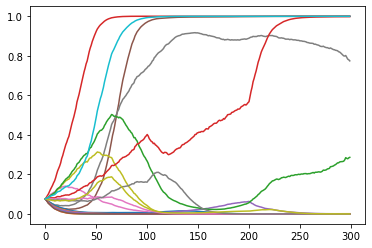

In [13]:
for i in range(20):
    plt.plot(memo_out1.T[i])

In [26]:
#リカレント層（LI）の出力に対する判断層の再学習　relearning　woth new output of Reccurebnt layer(LI)
loss_memo = li_rnn.to_li_para(1000000)

loss: [[ 4.44779829e-09 -7.47854672e-06]] epoch: 995500
_________
tnum 6
out2: [[4.44779829e-09 9.99992521e-01]]
t: [[0. 1.]]
x: [[0.    0.    0.993 1.    0.    0.977 0.    0.839 0.    0.    0.    0.
  0.174 0.    0.008 0.    0.005 0.    0.362 1.    0.    0.    0.    0.99
  0.    1.    0.    0.999 0.004 0.    0.    0.75  1.    0.014 0.    0.997
  0.64  0.746 1.    1.    0.    0.032 0.    1.    0.998 0.    0.    0.002
  0.035 0.    0.001 0.014 0.    1.    0.998 0.008 0.    0.    0.    1.
  0.102 0.002 1.    0.985 0.    0.961 0.    0.    0.    0.    1.    1.
  0.    0.999 0.068 0.978 0.    1.    1.    0.321 0.    1.    0.    0.
  0.    0.    0.971 0.    0.044 0.    0.    1.    0.    0.    0.    0.
  1.    0.866 0.999 1.   ]]
New_lr: 0.8808345925104947
_________
loss: [[-4.34998728e-05  3.42235874e-05]] epoch: 996000
_________
tnum 1
out2: [[9.99956500e-01 3.42235874e-05]]
t: [[1. 0.]]
x: [[0.    0.    0.    1.    0.445 1.    0.    0.503 0.    0.    0.    0.007
  0.313 0.975 0.    0.    0

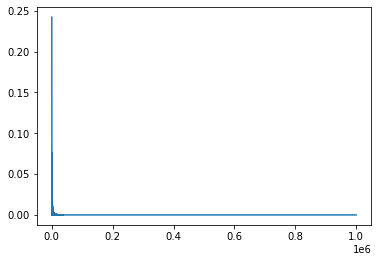

In [27]:
plt.plot(loss_memo)

[1. 0.]


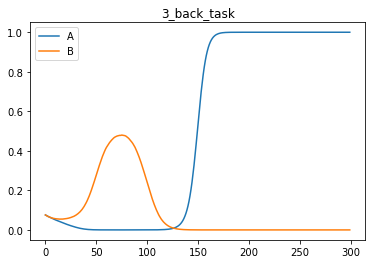

In [28]:
i=0
input = input_data[i]
memo_out1, memo_out2 = li_rnn.li_forward(input, target_data[i])
print(target_data[i])
plt.plot(memo_out2.T[0], label='A')
plt.plot(memo_out2.T[1], label='B')
plt.title('3_back_task')
plt.legend()
plt.show()

In [29]:
def visu_dic(i):
    input = input_data[i]
    memo_out1, memo_out2 = li_rnn.li_forward(input, target_data[i])
    print(target_data[i])
    plt.plot(memo_out2.T[0], label='A')
    plt.plot(memo_out2.T[1], label='B')
    plt.title('3_back_task')
    plt.legend()
    plt.show()

[1. 0.]


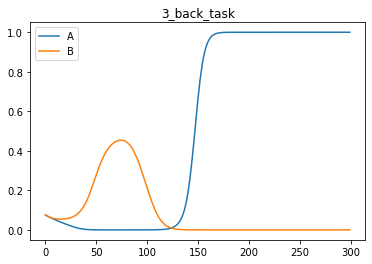

In [30]:
visu_dic(0) #iは入力パターンのインデックス i is index of input

[1. 0.]


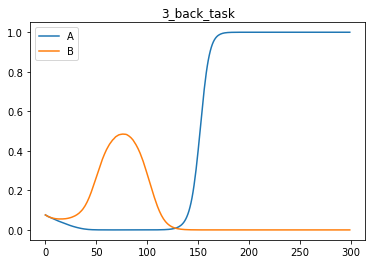

In [31]:
visu_dic(1)

[1. 0.]


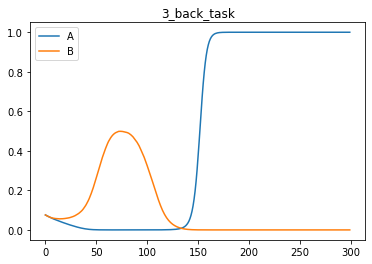

In [32]:
visu_dic(2)

[1. 0.]


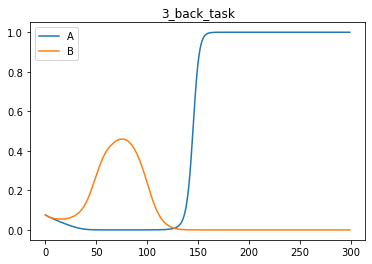

In [33]:
visu_dic(3)

[0. 1.]


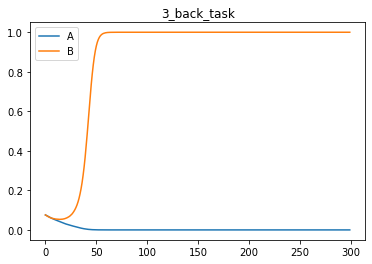

In [34]:
visu_dic(4)

[0. 1.]


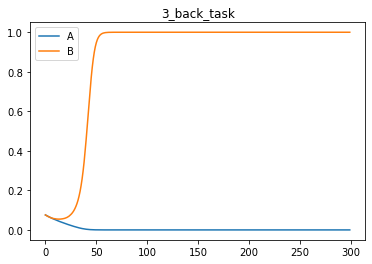

In [35]:
visu_dic(5)

[0. 1.]


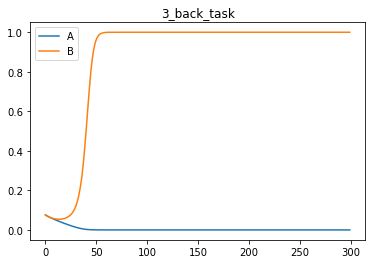

In [36]:
visu_dic(6)

[0. 1.]


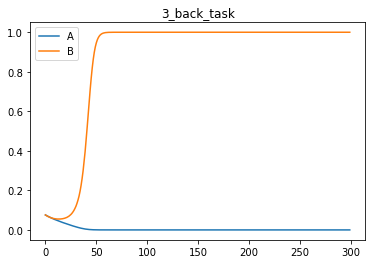

In [37]:
visu_dic(7)